In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')
(81312, 20)


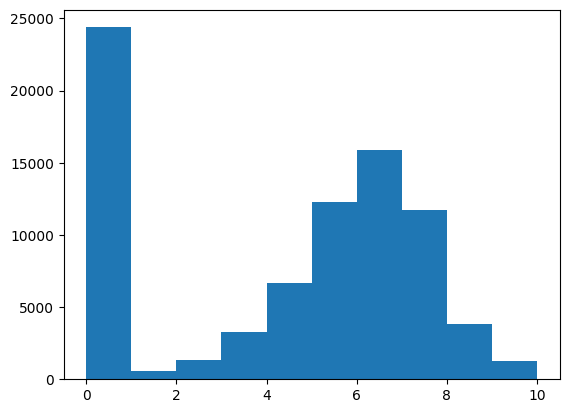

In [2]:

import pandas
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


games = pandas.read_csv("/content/drive/MyDrive/Machine Learning Projects/Board Review Prediction/games.csv.txt")

print(games.columns)
print(games.shape)


plt.hist(games["average_rating"])

plt.show()

id                             318
type                     boardgame
name                    Looney Leo
yearpublished                  0.0
minplayers                     0.0
maxplayers                     0.0
playingtime                    0.0
minplaytime                    0.0
maxplaytime                    0.0
minage                         0.0
users_rated                      0
average_rating                 0.0
bayes_average_rating           0.0
total_owners                     0
total_traders                    0
total_wanters                    0
total_wishers                    1
total_comments                   0
total_weights                    0
average_weight                 0.0
Name: 13048, dtype: object
id                                  12333
type                            boardgame
name                    Twilight Struggle
yearpublished                      2005.0
minplayers                            2.0
maxplayers                            2.0
playingtime          

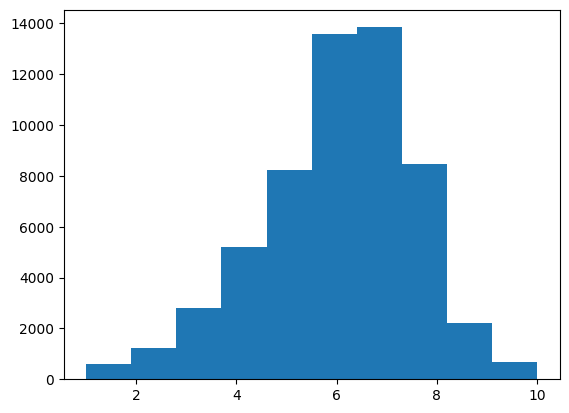

In [3]:

print(games[games["average_rating"] == 0].iloc[0])
print(games[games["average_rating"] > 0].iloc[0])


games = games[games["users_rated"] > 0]

games = games.dropna(axis=0)


plt.hist(games["average_rating"])


plt.show()

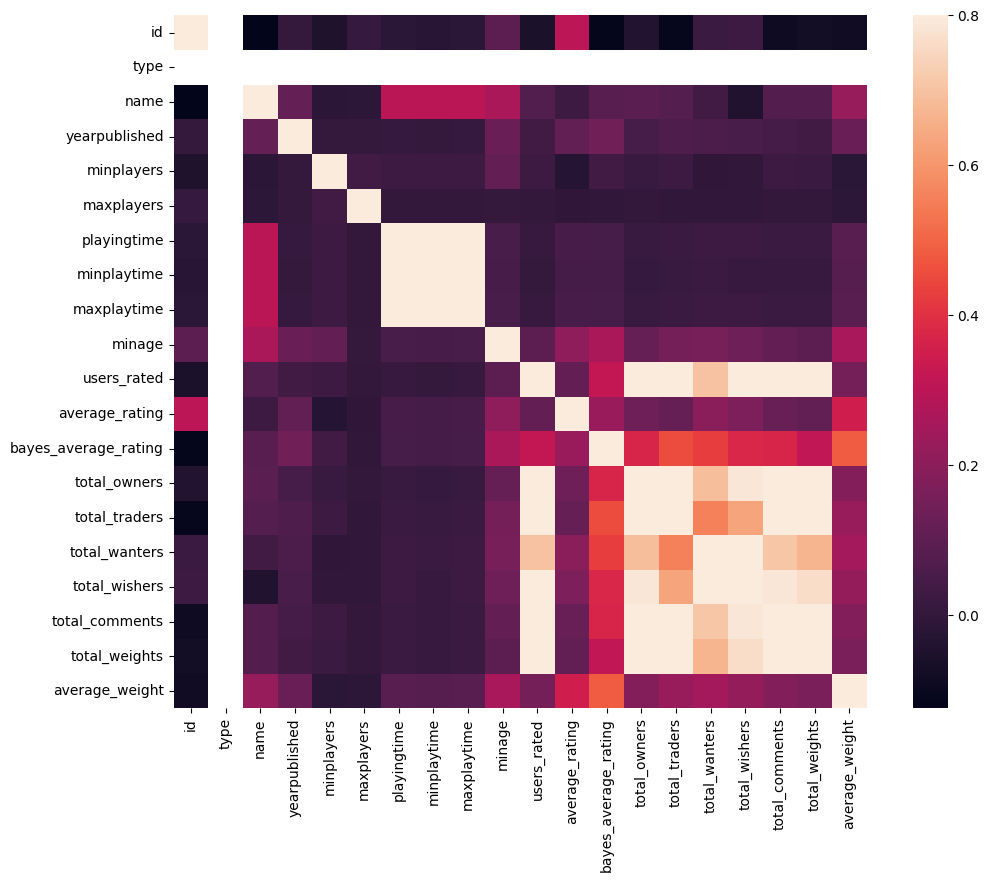

In [5]:
# Convert relevant columns to numeric type, handling non-numeric values
for col in games.columns:
    if games[col].dtype == 'object':  # Check if column is of object type (likely string)
        try:
            games[col] = pandas.to_numeric(games[col], errors='coerce')  # Convert to numeric, replace non-convertibles with NaN
        except:
            pass  # Skip columns that cannot be converted

corrmat = games.corr()
fig = plt.figure(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

In [6]:
columns = games.columns.tolist()
# Filter the columns to remove ones we don't want.
columns = [c for c in columns if c not in ["bayes_average_rating", "average_rating", "type", "name", "id"]]

# Store the variable we'll be predicting on.
target = "average_rating"

In [8]:
from sklearn.model_selection import train_test_split # Import from the correct module

# Generate the training set.  Set random_state to be able to replicate results.
train = games.sample(frac=0.8, random_state=1)
# Select anything not in the training set and put it in the testing set.
test = games.loc[~games.index.isin(train.index)]
# Print the shapes of both sets.
print(train.shape)
print(test.shape)

(45515, 20)
(11379, 20)


In [9]:
# Import the linear regression model.
from sklearn.linear_model import LinearRegression

# Initialize the model class.
model = LinearRegression()
# Fit the model to the training data.
model.fit(train[columns], train[target])

# Import the scikit-learn function to compute error.
from sklearn.metrics import mean_squared_error

# Generate our predictions for the test set.
predictions = model.predict(test[columns])

# Compute error between our test predictions and the actual values.
mean_squared_error(predictions, test[target])

2.0788190326293234

In [10]:
# Import the random forest model.
from sklearn.ensemble import RandomForestRegressor

# Initialize the model with some parameters.
model = RandomForestRegressor(n_estimators=100, min_samples_leaf=10, random_state=1)
# Fit the model to the data.
model.fit(train[columns], train[target])
# Make predictions.
predictions = model.predict(test[columns])
# Compute the error.
mean_squared_error(predictions, test[target])

1.4458625791207198